# College Event Feedback Analysis

Sentiment Analysis using TextBlob

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


In [7]:

# Load dataset
df = pd.read_csv("C:/Users/ACER/Downloads/college_event_feedback_records.csv")
df.head()


,Event_Name,Rating,Organization,Content,Speaker,Feedback
0,Cultural Fest,4,2,2,1,The event was okay
1,Guest Lecture,3,4,1,1,Could be better
2,Guest Lecture,4,2,5,4,Excellent organization and great speakers
3,Tech Fest,5,2,4,3,"Amazing experience, learned a lot"
4,Tech Fest,5,1,4,1,Excellent organization and great speakers


In [9]:
df.isnull().sum()

Event_Name      0
Rating          0
Organization    0
Content         0
Speaker         0
Feedback        0
dtype: int64

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Event_Name    1000 non-null   object
 1   Rating        1000 non-null   int64 
 2   Organization  1000 non-null   int64 
 3   Content       1000 non-null   int64 
 4   Speaker       1000 non-null   int64 
 5   Feedback      1000 non-null   object
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [11]:
df.describe()

,Rating,Organization,Content,Speaker
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.820000,2.964000,3.001000,2.973000
std,1.161443,1.413755,1.408895,1.417844
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,2.000000,2.000000
50%,4.000000,3.000000,3.000000,3.000000
75%,5.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [13]:

# Sentiment function
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Feedback"].apply(get_sentiment)
df


,Event_Name,Rating,Organization,Content,Speaker,Feedback,Sentiment
0,Cultural Fest,4,2,2,1,The event was okay,Positive
1,Guest Lecture,3,4,1,1,Could be better,Positive
2,Guest Lecture,4,2,5,4,Excellent organization and great speakers,Positive
3,Tech Fest,5,2,4,3,"Amazing experience, learned a lot",Positive
4,Tech Fest,5,1,4,1,Excellent organization and great speakers,Positive
...,...,...,...,...,...,...,...
995,AI Workshop,1,4,2,4,The event was boring,Negative
996,Tech Fest,1,3,4,1,The speaker was not engaging,Negative
997,Guest Lecture,5,4,3,4,Loved the content and interaction,Positive
998,Guest Lecture,2,5,1,3,Poor organization and timing issues,Negative


In [22]:
df["Sentiment"].value_counts()

Sentiment
Positive    810
Negative    190
Name: count, dtype: int64

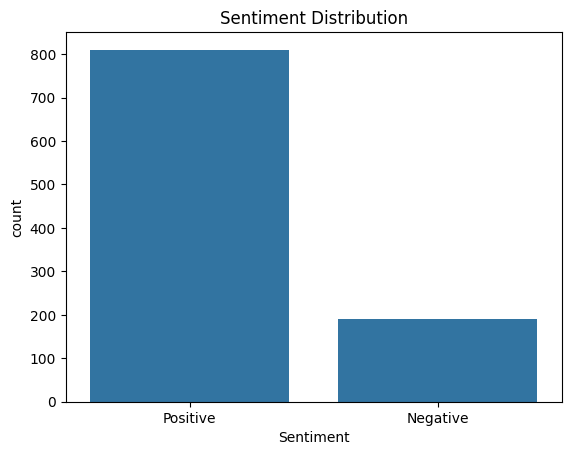

In [14]:

# Sentiment distribution
sns.countplot(x="Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()


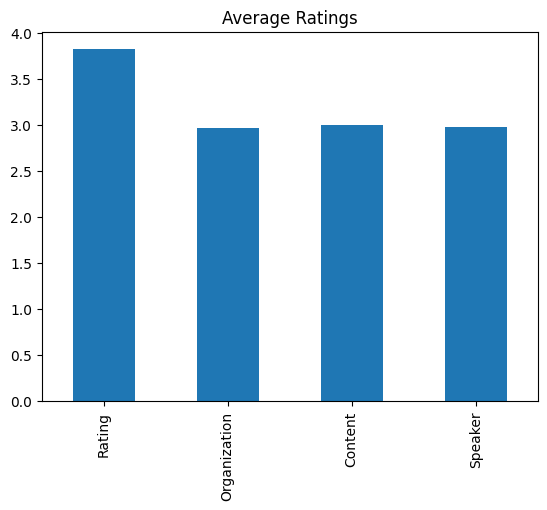

In [15]:

# Average ratings
avg = df[['Rating','Organization','Content','Speaker']].mean()
avg.plot(kind='bar', title='Average Ratings')
plt.show()


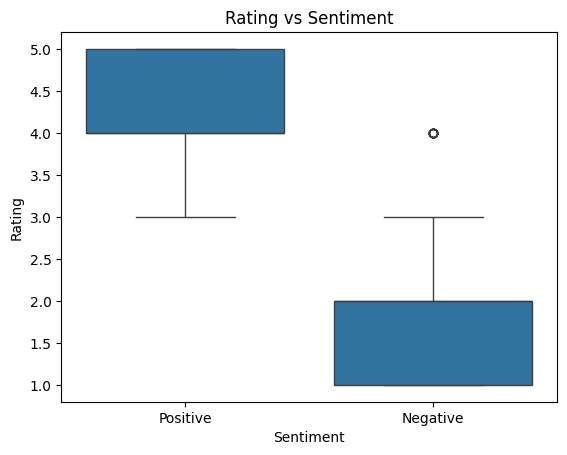

In [16]:

# Rating vs Sentiment
sns.boxplot(x='Sentiment', y='Rating', data=df)
plt.title('Rating vs Sentiment')
plt.show()



## Key Insights
- Majority feedback is Positive
- Higher ratings align with positive sentiment
- Negative feedback highlights organization & logistics issues


## Key Recommendations for Event Organizers
* Improve Event Planning & Logistics
* Enhance Speaker Engagement
* Optimize Event Scheduling
* Improve Content Quality & Relevance
* Use Feedback for Continuous Improvement
* Introduce Real-Time Feedback Mechanisms